# Theoretical review of Grover's algorithm
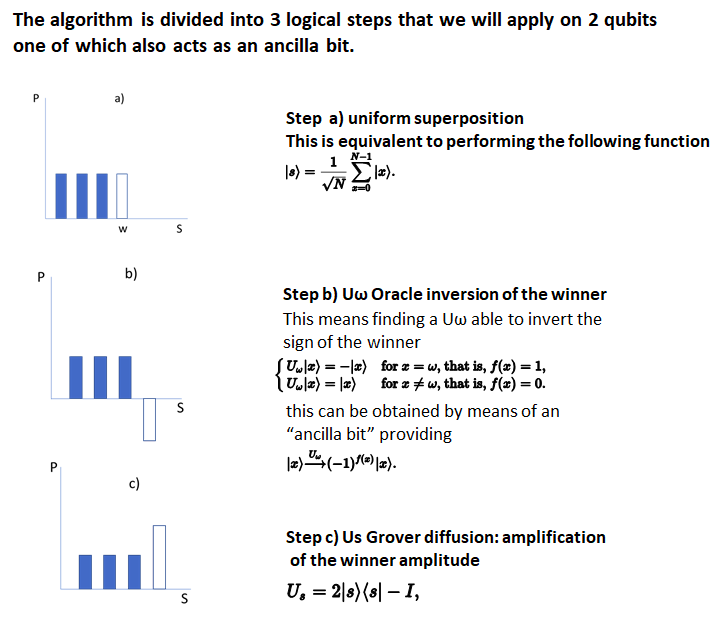

## the overall algorithm is as follows<a id='sectionB'></a>
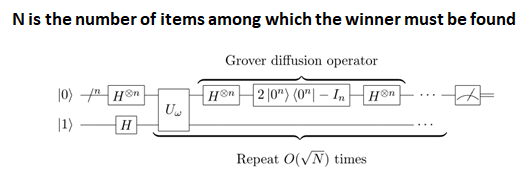

## Let's have a look at the Composer... <a id='sectionB'></a>


# Application of the Grover algorithm

Below is an example of an application with QISKIT of the Grover algorithm in the case of a search in a list of 4 items using 2 qubits (q0 and q1 in analogy with what was done on the Composer part).

The exercise is based on the following steps:

1) importing the code

2) initialization of the circuit

3) superposition of the whole system

4) presentation of the program to the user and request for input to set the "winner"

5) starting from the assignment |00> --> Hearts |10> --> Paintings |01> --> Flowers |11> --> Spades, conditioned creation of Oracles as C-Z with visualization of various circuits

6) creation of Us from C-Z and visualization of the relative circuit

7) run in simulated mode

8) run on real processor 

9) print and plot of the result 


Code import
==========
## Let's load the necessary Qiskit libraries into the Python environment and initialize the circuit <a id='sectionB'></a>

The circuit is initialized to 2 qubits: q0 and q1

Commented lines of code (those starting with #) have to be modified (by deleting the #) if the code runs on a docker image or on IBM Watson Studio


In [5]:
#!pip install --upgrade pip
#!pip install -U qiskit
#!pip install -U latex
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
#import latex
import numpy as np


## Let's initialize the circuit<a id='sectionB'></a>

In [6]:
# 2 bit registry creation.
q = QuantumRegister(2, 'q')

# Circuit creation 
circ = QuantumCircuit(q)

Let's make the superposition
========================
## We apply a Hadamard gate to the two qubits realizing a superposition state <a id='sectionB'></a>

The circuit is displayed

In [7]:
# Application of the superposition to the whole system

q0_superposition=circ.h(q[0])
circ.h(q[1])
circ.barrier()
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram, plot_state


/srv/conda/lib/python3.7/site-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)
WARNING Unable to compile latex. The output from the pdflatex command can be found in latex_error.log


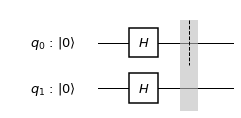

In [8]:
circuit_drawer(circ)

We visualize the array of densities after the superposition


In [9]:
# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
state_superposition = job.result().get_statevector(circ)
print(state_superposition)
rho_superposition= np.outer(state_superposition, state_superposition.conj())
plot_state(rho_superposition,'bloch')

/srv/conda/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning
/srv/conda/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning
/srv/conda/lib/python3.7/site-packages/qiskit/tools/visualization/_state_visualization.py:600: DeprecationWarning: plot_state is deprecated, and will be removed in                   the 0.9 release. Use the plot_state_ * functions                   instead.
  DeprecationWarning)


[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


/srv/conda/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning
/srv/conda/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


## We ask the user for input to define the "winner".  <a id='sectionB'></a>

In [10]:
print("\n\n\n\n===== Welcome! =====\n\n")
print("  ~~ Let's take this test ~~ ")
print("\n\n")
print("Select the winner among:")
print("a) Hearts")
print("b) Pictures")
print("c) Flowers")
print("d) Spades")
chosen = 0
while (chosen==0):
#	scelta = getpass.getpass("make your choise. (a, b, c, d, e or f)\n")
	scelta = input("Choose your card (a, b, c, d)\n")
	if scelta == "a":
		bit = "|00>"
	if scelta == "b":
		bit = "|10>"
	if scelta == "c":
		bit = "|01>"
	if scelta == "d":
		bit = "|11>"
	if scelta in ["a","b","c","d"]:
		chosen = 1

		print("Choice",scelta)
		print ("Linked to:", bit)
	else:
		print("wrong selection, retry")






===== Welcome! =====


  ~~ Let's take this test ~~ 



Select the winner among:
a) Hearts
b) Pictures
c) Flowers
d) Spades
Choose your card (a, b, c, d)
d
Choice d
Linked to: |11>


## We create an oracle for each winner <a id='sectionB'></a>
In a cycle of if we create the Oracle function depending on the type as port C-Z 

/srv/conda/lib/python3.7/site-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)
WARNING Unable to compile latex. The output from the pdflatex command can be found in latex_error.log


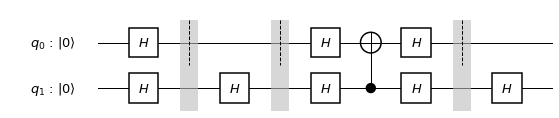

In [11]:
	if scelta == "a":
		circ.s(q[0])
		circ.s(q[1])
		circ.barrier()        
		circ.h(q[1])
		circ.barrier()        
		circ.h(q[0])
		circ.h(q[1])
		circ.cx(q[1], q[0])
		circ.h(q[0])
		circ.h(q[1])
		circ.barrier()        
		circ.h(q[1])
		circ.barrier()          
		circ.s(q[0])      
		circ.s(q[1])
		circ.barrier()

	if scelta == "b":
		circ.s(q[1])
		circ.h(q[1])
		circ.barrier()        
		circ.h(q[0])
		circ.h(q[1])
		circ.cx(q[1], q[0])
		circ.h(q[0])
		circ.h(q[1])
		circ.barrier()        
		circ.h(q[1])
		circ.barrier()        
		circ.s(q[1])
		circ.barrier()

	if scelta == "c":
		circ.s(q[0])
		circ.barrier()          
		circ.h(q[1])
		circ.barrier()         
		circ.h(q[0])
		circ.h(q[1])
		circ.cx(q[1], q[0])
		circ.h(q[0])
		circ.h(q[1])
		circ.barrier()         
		circ.h(q[1])
		circ.barrier()         
		circ.s(q[0])

	if scelta == "d":
		circ.h(q[1])
		circ.barrier()        
		circ.h(q[0])
		circ.h(q[1])
		circ.cx(q[1], q[0])
		circ.h(q[0])
		circ.h(q[1])
		circ.barrier()
		circ.h(q[1])
                 
from qiskit.tools.visualization import circuit_drawer

circuit_drawer(circ)


Let's try to simplify the circuit considering that QISKIT does not have the limitations of Composer in the design of CNOT 01

Let's see the array of densities after the oracle

In [12]:
# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
state_superposition = job.result().get_statevector(circ)
state_superposition

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

Neglecting the imaginary component of the order of 10 to -16 we can conclude that after the Oracle only the winner is reversed sign

## Let's create the Us function<a id='sectionB'></a>
which achieves a rotation with amplitude amplification
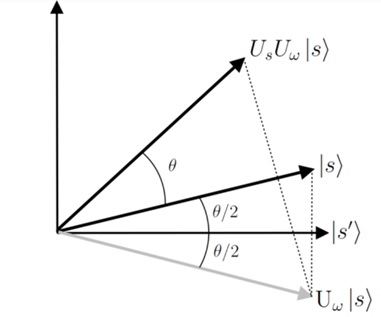

/srv/conda/lib/python3.7/site-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)
WARNING Unable to compile latex. The output from the pdflatex command can be found in latex_error.log


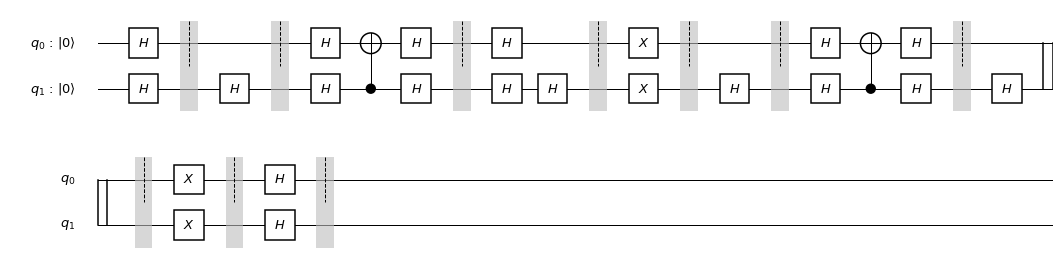

In [13]:
circ.h(q[0])
circ.h(q[1])
circ.barrier()
circ.x(q[0])
circ.x(q[1])
circ.barrier()

circ.h(q[1])
circ.barrier()
circ.h(q[0])
circ.h(q[1])
circ.cx(q[1], q[0])
circ.h(q[0])
circ.h(q[1])
circ.barrier()
circ.h(q[1])
circ.barrier()

circ.x(q[0])
circ.x(q[1])
circ.barrier()
circ.h(q[0])
circ.h(q[1])
circ.barrier()

from qiskit.tools.visualization import circuit_drawer

circuit_drawer(circ)

/srv/conda/lib/python3.7/site-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)
WARNING Unable to compile latex. The output from the pdflatex command can be found in latex_error.log


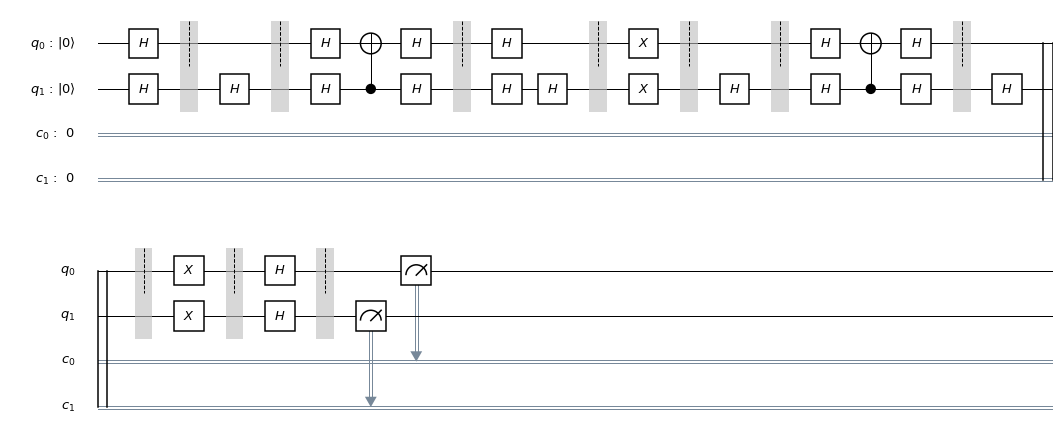

In [14]:
# Create a Classical Register with 2 bits.
c = ClassicalRegister(2, 'c')
# Create a Quantum Circuit
meas = QuantumCircuit(q, c)
# map the quantum measurement to the classical bits
#meas.barrier ()
meas.measure(q,c)

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
circuit_drawer(qc)


## We run the circuit in the first instance with the simulator <a id='sectionB'></a>
We report the values found in measure 

In [15]:

# Import Aer
from qiskit import Aer

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job = execute(qc, backend_sim)

# Grab the results from the job.
result = job.result()

counts = result.get_counts(qc)
print("valore ", counts)

valore  {'11': 1024}


/srv/conda/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


## Let's plot the values <a id='sectionB'></a>
We report the value identified and the occurrences in the set of readings

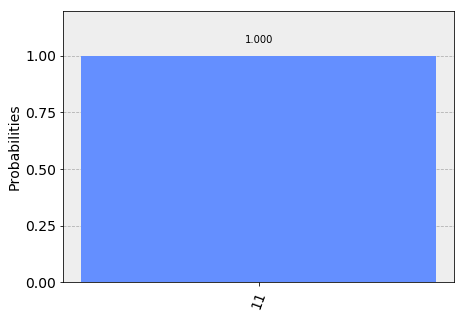

In [16]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## We run the circuit with the real processor <a id='sectionB'></a>
 The following is the sequence of necessary operations:
 
 a) we import IBMQ, i.e. the management libraries of the real processor
 
 b) we save (save_account function) our credentials obtained from the advanced functions of my account on IBM Q Experience
 
 c) we load (load_accounts) the credentials 
 
 d) we print the available backends (backends)
 
 e) from qiskit.backends.ibmq we import the function least_busy that allows to evaluate the optimal backend. We apply this function to the backends excluding the qasm simulator "devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] > 2 and not x.configuration()['simulator'])".
 
 f) we import all features from qiskit.wrapper.jupyter
 
 g) we set %%qiskit_job_status that will serve to visualize the ongoing of our job; then we set in a variable the number of shots and the maximum number of credits allowed; then we execute the job passing: circuit name, backend name, shot number, maximum credits number
 
 h) as above we put in result_real the measurements and make the plot
 

In [21]:
from qiskit import IBMQ
IBMQ.delete_accounts()
IBMQ.save_account('7aecb025c75e61c95fcde04d3bdb0109e0ce735b872bbfb7d9a4b8ef336d0b061f222286e9f15352f85b93930d3b0f610b3ed88f7bfc961008f603a35733e07b')

In [22]:
IBMQ.load_accounts()

In [23]:
print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [25]:
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

In [26]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(IBMQ.backends(filters=lambda x: not x.configuration().simulator))
backend.name()

'ibmqx4'

In [28]:
#from qiskit.wrapper.jupyter import *

In [29]:
#%%qiskit_job_status
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [30]:
result_real = job_exp.result()

In [31]:
counts_real=result_real.get_counts(qc)

## Let's plot the values <a id='sectionB'></a>
We report the value identified and the occurrences in the set of readings

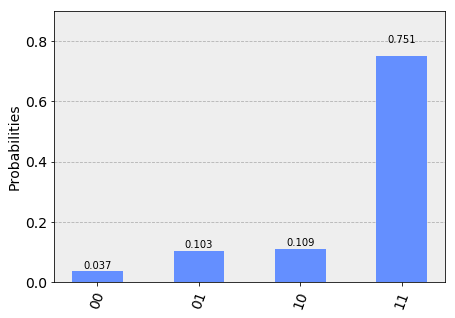

In [32]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts_real)

# The previous value was found in only one machine cycle

How many would it take to find the winner with the classic circuit?



In [33]:
counter=0
for i in ["a","b","c","d"]:
	counter=counter+1
	if i == scelta:
		print("winner found after ", counter) 

winner found after  4
